In [1]:
import cobra
from modelseedpy import MSBuilder, MSATPCorrection, MSMedia, MSGapfill
import json
from tqdm import tqdm
import cobrakbase

modelseedpy 0.4.3
cobrakbase 0.4.0


In [2]:
config = cobra.Configuration()
config

Attribute,Description,Value
solver,Mathematical optimization solver,glpk
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,31
cache_directory,Path for the model cache,C:\Users\filip\AppData\Local\opencobra\cobrapy\Cache
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


# examining the Betaine-consuming taxa

In [6]:
target_model_ids = {
    'Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.concoct_out.9.contigs',
 'Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.metabat.47.contigs',
 'Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.metabat.51.contigs',
 'Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.27.contigs',
 'Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.45.contigs',
 'Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.48.contigs',
 'Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.50.contigs',
 'Salt_Pond_MetaG_R1_B_D1_MG_DASTool_bins_concoct_out.59.contigs',
 'Salt_Pond_MetaG_R1_B_D1_MG_DASTool_bins_metabat.58.contigs',
 'Salt_Pond_MetaG_R1_B_D2_MG_DASTool_bins_concoct_out.73.contigs',
 'Salt_Pond_MetaG_R1_C_D1_MG_DASTool_bins_maxbin.047.contigs',
 'Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_concoct_out.85.contigs',
 'Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_metabat.40.contigs',
 'Salt_Pond_MetaG_R2_A_D1_MG_DASTool_bins_concoct_out.98.contigs',
 'Salt_Pond_MetaG_R2_B_D2_MG_DASTool_bins_metabat.52.contigs'}

In [7]:
from json import dump
from pandas import read_csv

phylogeny = read_csv("/home/freiburger/Documents/MicrobiomeNotebooks/salterns/data/Saltern_phylogeny.csv")
phylogeny = dict(zip(phylogeny["User Genome"], phylogeny["Classification"]))

definitions = {'d': 'Kingdom', 'p': 'Phylum', 'c': 'Class', 'o': 'Order', 'f': 'Family', 'g': 'Genus', 's': 'Species'}
for MAG, taxa in phylogeny.items():
    phylogeny[MAG] = {definitions[level]: tax for level, tax in (p.split('__') for p in taxa.split(';'))}

dump(phylogeny, open("/home/freiburger/Documents/MicrobiomeNotebooks/salterns/data/Saltern_phylogeny.json", "w"), indent=2)
phylogeny

{'Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.concoct_out.44.contigs__': {'Kingdom': 'Bacteria',
  'Phylum': 'Desulfobacterota_F',
  'Class': 'Desulfuromonadia',
  'Order': 'Desulfuromonadales',
  'Family': 'SZUA-401',
  'Genus': '',
  'Species': ''},
 'Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.concoct_out.54.contigs__': {'Kingdom': 'Bacteria',
  'Phylum': 'Proteobacteria',
  'Class': 'Gammaproteobacteria',
  'Order': 'Thiohalorhabdales',
  'Family': 'Thiohalorhabdaceae',
  'Genus': 'Thiohalorhabdus',
  'Species': ''},
 'Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.concoct_out.9.contigs__': {'Kingdom': 'Bacteria',
  'Phylum': 'Firmicutes_A',
  'Class': 'Clostridia',
  'Order': 'Tissierellales',
  'Family': 'Dethiosulfatibacteraceae',
  'Genus': 'UBA8670',
  'Species': ''},
 'Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.metabat.15.contigs__': {'Kingdom': 'Bacteria',
  'Phylum': 'Bacteroidota',
  'Class': 'Rhodothermia',
  'Order': 'Balneolales',
  'Family': 'Balneolaceae',
  'Genus': 'Fodinibius',
  'S

In [10]:
for model in target_model_ids:
    display(phylogeny.get(model+"__", "No taxonomy found for model"))

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_A',
 'Class': 'Clostridia',
 'Order': 'Peptostreptococcales',
 'Family': 'BM714',
 'Genus': 'BM714',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Synergistota',
 'Class': 'Synergistia',
 'Order': 'Synergistales',
 'Family': '',
 'Genus': '',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Synergistota',
 'Class': 'Synergistia',
 'Order': 'Synergistales',
 'Family': '',
 'Genus': '',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_F',
 'Class': 'Halanaerobiia',
 'Order': 'Halanaerobiales',
 'Family': '',
 'Genus': '',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_F',
 'Class': 'Halanaerobiia',
 'Order': 'Halanaerobiales',
 'Family': 'Halanaerobiaceae',
 'Genus': 'Halanaerobium',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_F',
 'Class': 'Halanaerobiia',
 'Order': 'Halanaerobiales',
 'Family': '',
 'Genus': '',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_A',
 'Class': 'Clostridia',
 'Order': 'Peptostreptococcales',
 'Family': 'BM714',
 'Genus': 'BM714',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_A',
 'Class': 'Clostridia',
 'Order': 'Peptostreptococcales',
 'Family': 'BM714',
 'Genus': 'BM714',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_A',
 'Class': 'Clostridia',
 'Order': 'Peptostreptococcales',
 'Family': 'Acidaminobacteraceae',
 'Genus': '',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_A',
 'Class': 'Clostridia',
 'Order': 'Tissierellales',
 'Family': 'Dethiosulfatibacteraceae',
 'Genus': 'UBA8670',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_F',
 'Class': 'Halanaerobiia',
 'Order': 'Halanaerobiales',
 'Family': '',
 'Genus': '',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_F',
 'Class': 'Halanaerobiia',
 'Order': 'Halanaerobiales',
 'Family': 'Halanaerobiaceae',
 'Genus': 'Halanaerobium',
 'Species': 'Halanaerobium saccharolyticum'}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_F',
 'Class': 'Halanaerobiia',
 'Order': 'Halanaerobiales',
 'Family': 'Halanaerobiaceae',
 'Genus': 'Halanaerobium',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_A',
 'Class': 'Clostridia',
 'Order': 'Tissierellales',
 'Family': 'Dethiosulfatibacteraceae',
 'Genus': 'UBA8670',
 'Species': ''}

{'Kingdom': 'Bacteria',
 'Phylum': 'Firmicutes_A',
 'Class': 'Clostridia',
 'Order': 'Peptostreptococcales',
 'Family': 'BM714',
 'Genus': 'BM714',
 'Species': ''}

In [6]:
from modelseedpy import MSBuilder
models_base = {}
for i in tqdm(target_model_ids):
    model = cobra.io.load_json_model(f'./models/{i}__.RAST.json')
    MSBuilder.add_atpm(model)
    models_base[i] = model

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [07:00<00:00, 28.05s/it]


In [15]:
M_CORE_EMPTY = {
    'EX_cpd00001_e0': 1000,
    'EX_cpd00067_e0': 1000,
    'EX_cpd00007_e0': 100,
} 
for model_name in models_base:
    print(model_name)
    model_base = models_base[model_name]
    disable = ['rxn23850_c0', 'rxn09193_c0', 'rxn05315_c0', 'rxn05206_c0']
    for rxn_id in disable:
        if rxn_id in model_base.reactions:
            rxn = model_base.reactions.get_by_id(rxn_id)
            rxn.lower_bound = 0
            rxn.upper_bound = 0
    disable_lb = [
        'rxn09188_c0', 'rxn00929_c0', 
              'rxn00145_c0', 'rxn00499_c0', 'rxn00146_c0',
              'rxn08934_c0', 'rxn08941_c0', 'rxn08935_c0', 'rxn08942_c0', # not sure about these
              'rxn11942_c0', 'rxn11941_c0',
              'rxn43329_c0', 'rxn11940_c0',
              'rxn40559_c0', 'rxn04159_c0', 'rxn04705_c0',
        'rxn14415_c0',
        'sul00003_c0', 'rxn48579_c0',
        'rxn39860_c0'
             ]
    for rxn_id in disable_lb:
        if rxn_id in model_base.reactions:
            rxn = model_base.reactions.get_by_id(rxn_id)
            rxn.lower_bound = 0
    rxn_balance_check = ['rxn15395_c0', 'rxn28338_c0']
    for rxn_id in rxn_balance_check:
        if rxn_id in model_base.reactions:
            rxn = model_base.reactions.get_by_id(rxn_id)
            check = {'charge': -1, 'H': -1}
            if rxn.check_mass_balance() == check:
                print(rxn)
                rxn.add_metabolites({
                    model_base.metabolites.cpd00067_c0: +1
                })
                print(rxn.check_mass_balance())
    model_base.medium = {k:v for k, v in M_CORE_EMPTY.items() if k in model_base.reactions}
    model_base.objective = 'ATPM_c0'
    sol = cobra.flux_analysis.pfba(model_base)
    if sol.fluxes['ATPM_c0'] > 0.0:
        raise ValueError('!')
        break
print('no moar loops!')

Salt_Pond_MetaG_R1_B_D1_MG_DASTool_bins_metabat.58.contigs
Salt_Pond_MetaG_R1_B_D1_MG_DASTool_bins_concoct_out.59.contigs
Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_concoct_out.85.contigs
Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.metabat.47.contigs
Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.concoct_out.9.contigs
Salt_Pond_MetaG_R2_A_D1_MG_DASTool_bins_concoct_out.98.contigs
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.45.contigs
Salt_Pond_MetaG_R2_B_D2_MG_DASTool_bins_metabat.52.contigs
Salt_Pond_MetaG_R1_C_D1_MG_DASTool_bins_maxbin.047.contigs
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.27.contigs
Salt_Pond_MetaG_R1_B_D2_MG_DASTool_bins_concoct_out.73.contigs
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.50.contigs
Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_metabat.40.contigs
Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.metabat.51.contigs
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.48.contigs
no moar loops!


In [28]:
template_neg = cobrakbase.io.load_kbase_zip_object('./GramNegModelTemplateV6_test.json.zip')
from modelseedpy.core.mstemplate import MSTemplateReaction, MSTemplateSpecies
rxs17220_c = MSTemplateReaction('rxs17220_c', 'rxs17220_c', 'Betaine Reductase', '', 0, 1000, gapfill_direction='>')
rxs17220_c.add_metabolites({
    template_neg.compcompounds.cpd28060_c: -1,
    template_neg.compcompounds.cpd00540_e: -1,
    template_neg.compcompounds.cpd00067_c: -2,
    template_neg.compcompounds.cpd00009_c: -1,
    template_neg.compcompounds.cpd27735_c:  1,
    template_neg.compcompounds.cpd00441_e:  1,
    template_neg.compcompounds.cpd00196_c:  1,
    template_neg.compcompounds.cpd00001_c:  1,
})
print(rxs17220_c.check_mass_balance())
template_neg.add_reactions([rxs17220_c])
for model_id, model in models_base.items():
    if 'rxs17220_c0' not in model.reactions:
        model.add_reactions([template_neg.reactions.rxs17220_c.to_reaction(model)])
        print('added Betaine Reductase')

{}


In [45]:
template_core = cobrakbase.io.load_kbase_zip_object('./CoreBacV5.1.json.zip')
template_core.add_reactions([rxs17220_c, template_neg.reactions.rxn27318_c])

In [46]:
from modelseedpy.core.msatpcorrection import load_default_medias

In [47]:
medias = load_default_medias()
from modelseedpy.core.msmedia import MSMedia, MediaCompound
media_core_bet = MSMedia('Bet')
media_core_bet.id = 'Bet'
media_core_bet.name = 'Bet'
media_core_bet.mediacompounds.append(MediaCompound('cpd00540', -1, 1000))
media_core_bet.mediacompounds.append(MediaCompound('cpd00001', -1000, 1000))
media_core_bet.mediacompounds.append(MediaCompound('cpd00067', -1000, 1000))
medias.clear()
medias.append([media_core_bet, 0.01])

In [48]:
len(medias)

1

In [85]:
import os
def conv_atp_results(atp_correction, tests):
    results = {'tests': {}, 'gapfill': {}}
    for x in tests:
        results['tests'][x['media'].id] = {
            'is_max_threshold': x['is_max_threshold'], 
            'threshold': x['threshold'], 
            'objective': x['objective'], 
        }
    for x in atp_correction.media_gapfill_stats:
        gp_stats = atp_correction.media_gapfill_stats[x]
        #print(x.id, gp_stats)
        if gp_stats:
            results['gapfill'][x.id] = {
                'reversed': gp_stats.get('reversed'),
                'new': gp_stats.get('new'),
                'target': gp_stats.get('target'),
                'minobjective': gp_stats.get('minobjective'),
                'binary_check': gp_stats.get('binary_check'),
            }
    return results
#for model_name in models_base:
for model_name in ['Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_concoct_out.85.contigs']:
    print(model_name)
    model_base = models_base[model_name]
    if not os.path.exists(f'./atp/{model_base.id}_bet.json'):
        model_gapfill = model_base.copy()
        atp_correction = MSATPCorrection(model_gapfill, template_core, medias,
                    compartment='c0', 
                    atp_hydrolysis_id='ATPM_c0',
                    load_default_medias=False)
        tests = atp_correction.run_atp_correction()
        atp_data = conv_atp_results(atp_correction, tests)
        with open(f'./atp/{model_base.id}_bet.json', 'w') as fh:
            fh.write(json.dumps(atp_data))
    else:
        print(f'skip {model_name}!')
    break

Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_concoct_out.85.contigs


INFO:modelseedpy.core.msmodelutl:Expansion time:empty:0.012155400007031858
INFO:modelseedpy.core.msmodelutl:Filtered count:0 out of 1089


In [61]:
for r in atp_data['gapfill']['Bet']['new']:
    if r[:-1] in template_core.reactions:
        print(r, template_core.reactions.get_by_id(r[:-1]).build_reaction_string(True))
    else:
        print('skip', r)

skip EX_cpd01024_e0
skip EX_cpd00425_e0
rxn00777_c0 ribose-5-phosphate [c] <=> D-Ribulose5-phosphate [c]
rxn03127_c0 Methyl CoM [c] + HTP [c] <=> H+ [c] + Methane [c] + CoM-S-S-CoB [c]
rxn24613_c0 CoM [c] + Methylated-MttC-Proteins [c] <=> H+ [c] + Methyl CoM [c] + MttC-Proteins [c]
rxn03020_c0 2 Na+ [c] + CoM [c] + 5-Methyl-H4MPT [c] <=> H4MPT [c] + 2 Na+ [e] + Methyl CoM [c]
rxn10471_c0 Methane [e] <=> Methane [c]
rxn15962_c0 Acetyl-CoA [c] + H+ [c] + H4MPT [c] <-- CoA [c] + CO [c] + 5-Methyl-H4MPT [c]
rxn00548_c0 Phosphate [c] + D-fructose-6-phosphate [c] <=> H2O [c] + Acetylphosphate [c] + D-Erythrose4-phosphate [c]
rxn09318_c0 (CH3)3N [c] <=> (CH3)3N [e]
rxn24612_c0 H+ [c] + (CH3)3N [c] + MttC-Proteins [c] <=> (CH3)2NH [c] + Methylated-MttC-Proteins [c]
rxn15961_c0 2 H+ [c] + Methanophenazine [c] + H2 [c] <=> 2 H+ [e] + Dihydromethanophenazine [c]
rxn03126_c0 H+ [c] + CoM-S-S-CoB [c] + Dihydromethanophenazine [c] <=> CoM [c] + HTP [c] + Methanophenazine [c]
rxn00173_c0 Phosphate [

In [8]:
atp_data = {}
for i in tqdm(target_model_ids):
    with open(f'./atp/{i}__.RAST.json', 'r') as fh:
        atp_data[i] = json.load(fh)
genome_core_gf = {}
for genome_id in atp_data:
    genome_core_gf[genome_id] = {}
    _data = atp_data[genome_id]
    for cond_id in _data['gapfill']:
        _gapfill_data = _data['gapfill'][cond_id]
        if _gapfill_data['target']:
            _gap_fill_add = list(filter(lambda x: x[:3] != 'EX_', _gapfill_data['new']))
            genome_core_gf[genome_id][cond_id] = len(_gap_fill_add)

100%|██████████| 15/15 [00:00<00:00, 3182.65it/s]


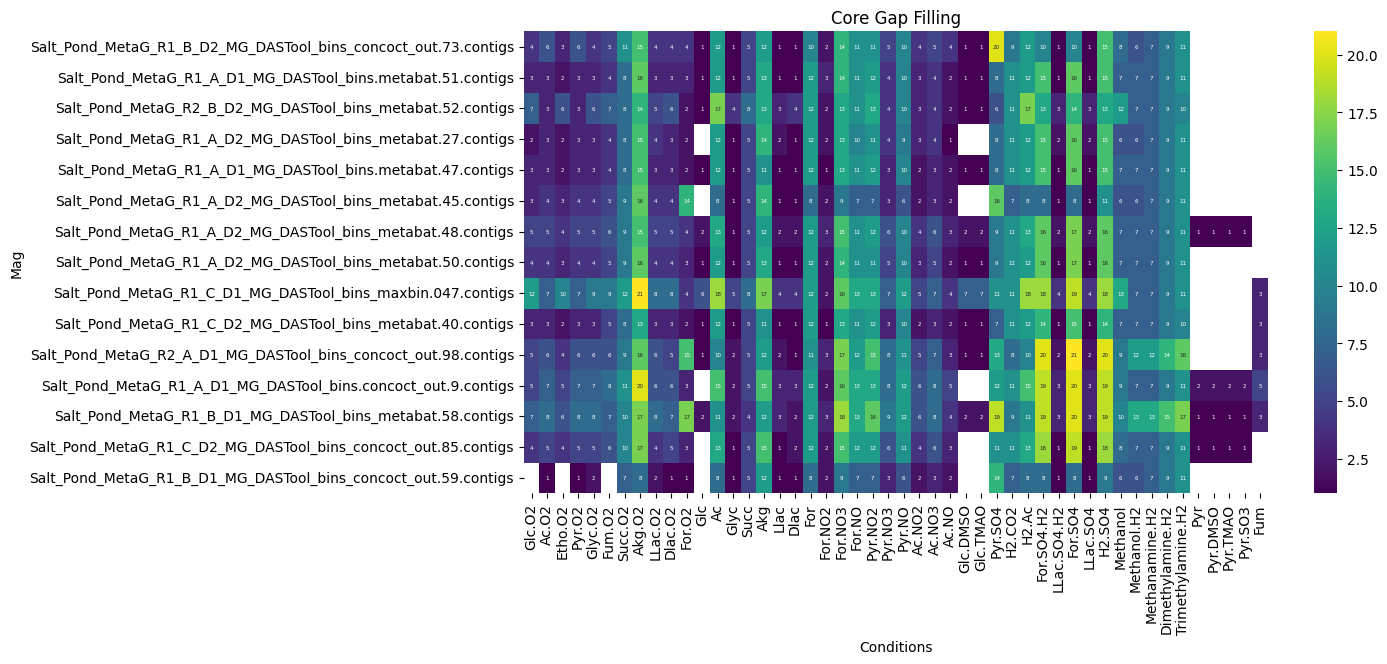

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Corrected dictionary
d = genome_core_gf

# Convert to DataFrame
df = pd.DataFrame.from_dict(d, orient='index')
plt.figure(figsize=(12, 6))
# Plot heatmap
sns.heatmap(df, annot=True, cmap='viridis', annot_kws={"size": 4})
plt.title("Core Gap Filling")
plt.ylabel("Mag")
plt.xlabel("Conditions")
plt.show()

Salt_Pond_MetaG_R1_B_D2_MG_DASTool_bins_concoct_out.73.contigs
rxn15395_c0: cpd00084_c0 + cpd00822_c0 --> cpd00036_c0 + cpd19019_c0
{}
Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.metabat.51.contigs
Salt_Pond_MetaG_R2_B_D2_MG_DASTool_bins_metabat.52.contigs
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.27.contigs
rxn15395_c0: cpd00084_c0 + cpd00822_c0 --> cpd00036_c0 + cpd19019_c0
{}
Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.metabat.47.contigs
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.45.contigs
rxn15395_c0: cpd00084_c0 + cpd00822_c0 --> cpd00036_c0 + cpd19019_c0
{}
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.48.contigs
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.50.contigs
Salt_Pond_MetaG_R1_C_D1_MG_DASTool_bins_maxbin.047.contigs
Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_metabat.40.contigs
Salt_Pond_MetaG_R2_A_D1_MG_DASTool_bins_concoct_out.98.contigs
Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.concoct_out.9.contigs
rxn15395_c0: cpd00084_c0 + cpd00822_c0 --> cpd00036_c0 + cpd19019

In [42]:
template_core.reactions.rxs17220_c.to_reaction(model_base) - template_core.reactions.rxn27318_c.to_reaction(model_base)

Reaction identifier,rxs17220_c0
Name,Betaine Reductase [c0]
Memory address,0x1df5cce36d0
Stoichiometry,cpd00005_c0 + cpd00009_c0 + 2 cpd00067_c0 + cpd00540_e0 --> cpd00001_c0 + cpd00006_c0 + cpd00196_c0 + cpd00441_e0 NADPH [c0] + Phosphate [c0] + 2 H+ [c0] + BET [e0] --> H2O [c0] + NADP [c0] + Acetylphosphate [c0] + (CH3)3N [e0]
GPR,
Lower bound,0
Upper bound,1000


In [36]:
template_neg.reactions.rxn27318_c.check_mass_balance()

{}

Reaction identifier,rxs17220_c
Name,Betaine Reductase
Memory address,0x7b836f122320
Stoichiometry,cpd00009_c + 2 cpd00067_c + cpd00540_e + cpd28060_c --> cpd00001_c + cpd00196_c + cpd00441_e + cpd27735_c Phosphate [c] + 2 H+ [c] + BET [e] + Red-Thioredoxin [c] --> H2O [c] + Acetylphosphate [c] + (CH3)3N [e] + Ox-Thioredoxin [c]
GPR,
Lower bound,0
Upper bound,1000


!
!
!
!
!
!
!
!
!
!
!
!
!
!
!


In [18]:
rxn_net = model.reactions.rxs17220_c0 - model.reactions.rxn27318_c0 - model.reactions.rxn00225_c0 + model.reactions.rxn00161_c0
print(rxn_net.check_mass_balance())
rxn_net

{}


Reaction identifier,rxs17220_c0
Name,Betaine Reductase [c0]
Memory address,0x7b836cff5840
Stoichiometry,cpd00008_c0 + cpd00009_c0 + 2 cpd00067_c0 + cpd00130_c0 + cpd00540_e0 --> cpd00001_c0 + cpd00002_c0 + cpd00011_c0 + cpd00020_c0 + cpd00029_c0 + cpd00441_e0 ADP [c0] + Phosphate [c0] + 2 H+ [c0] + L-Malate [c0] + BET [e0] --> H2O [c0] + ATP [c0] + CO2 [c0] + Pyruvate [c0] + Acetate [c0] + (CH3)3N [e0]
GPR,Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_concoct_out.85.contigs__.RAST.CDS.1729
Lower bound,0
Upper bound,1000


In [250]:
for model_id, model in models_base.items():
    if 'cpd00441_c0' in model.metabolites:
        print(model_id, model.metabolites.cpd00441_c0)
        for rxn in model.metabolites.cpd00441_c0.reactions:
            print('\t', rxn.build_reaction_string(True))

Salt_Pond_MetaG_R2_B_D2_MG_DASTool_bins_metabat.52.contigs cpd00441_c0
	 H+ [c0] + (CH3)3N [c0] + MttC-Proteins [c0] <=> (CH3)2NH [c0] + Methylated-MttC-Proteins [c0]
Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_metabat.40.contigs cpd00441_c0
	 H+ [c0] + (CH3)3N [c0] + MttC-Proteins [c0] <=> (CH3)2NH [c0] + Methylated-MttC-Proteins [c0]
Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.concoct_out.9.contigs cpd00441_c0
	 H+ [c0] + (CH3)3NO [c0] + 2-Demethylmenaquinol 8 [c0] <=> H2O [c0] + (CH3)3N [c0] + 2-Demethylmenaquinone 8 [c0]
Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_concoct_out.85.contigs cpd00441_c0
	 H+ [c0] + (CH3)3NO [c0] + 2-Demethylmenaquinol 8 [c0] <=> H2O [c0] + (CH3)3N [c0] + 2-Demethylmenaquinone 8 [c0]


In [243]:
for ex in model.exchanges:
    print(ex.id, list(ex.metabolites)[0].name)

EX_cpd00067_e0 H+ [e0]
EX_cpd00106_e0 Fumarate [e0]
EX_cpd00036_e0 Succinate [e0]
EX_cpd11576_e0 L-methionine R-oxide [e0]
EX_cpd04097_e0 Pb [e0]
EX_cpd00154_e0 Xylose [e0]
EX_cpd11597_e0 ARSENOBETAINE [e0]
EX_cpd00012_e0 PPi [e0]
EX_cpd01030_e0 Salicin [e0]
EX_cpd00129_e0 L-Proline [e0]
EX_cpd00971_e0 Na+ [e0]
EX_cpd01012_e0 Cd2+ [e0]
EX_cpd00276_e0 GLUM [e0]
EX_cpd00082_e0 D-Fructose [e0]
EX_cpd00080_e0 Glycerol-3-phosphate [e0]
EX_cpd00023_e0 L-Glutamate [e0]
EX_cpd00058_e0 Cu2+ [e0]
EX_cpd00107_e0 L-Leucine [e0]
EX_cpd00314_e0 D-Mannitol [e0]
EX_cpd01017_e0 Cys-Gly [e0]
EX_cpd00013_e0 NH3 [e0]
EX_cpd00244_e0 Ni2+ [e0]
EX_cpd11578_e0 hexanesulfonate [e0]
EX_cpd00179_e0 Maltose [e0]
EX_cpd00205_e0 K+ [e0]
EX_cpd00009_e0 Phosphate [e0]
EX_cpd00060_e0 L-Methionine [e0]
EX_cpd00137_e0 Citrate [e0]
EX_cpd00034_e0 Zn2+ [e0]
EX_cpd00076_e0 Sucrose [e0]
EX_cpd11579_e0 ethanesulfonate [e0]
EX_cpd01171_e0 Dulcose [e0]
EX_cpd00210_e0 Taurine [e0]
EX_cpd00264_e0 Spermidine [e0]
EX_cpd00637_e0 D

In [268]:
model_gf = models_base['Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.concoct_out.9.contigs']
min_biomass = 0.02
model.objective = 'bio1'
gapfill = MSGapfill(model_gf, default_gapfill_templates=[template], test_conditions={}, default_target='bio1')
gapfill.gfmodel.reactions.rxn05181_c0.upper_bound = 0

In [269]:
delete_bounds = [
    'rxn08615_c0',
    'rxn05579_c0',
    'rxn11678_c0',
]
for rxn_id in delete_bounds:
    if rxn_id in gapfill.gfmodel.reactions:
        rxn = gapfill.gfmodel.reactions.get_by_id(rxn_id)
        rxn.lower_bound = 0
        rxn.upper_bound = 0
change_bounds = {
    'rxn08615_c0': [0, 1000],
}
for rxn_id, [lb, ub] in change_bounds.items():
    if rxn_id in gapfill.gfmodel.reactions:
        rxn = gapfill.gfmodel.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lb
        rxn.upper_bound = ub

In [270]:
disable_lb = [
    'rxn02154_c0',
        'rxn00145_c0', # 
        'rxn00362_c0', # H2O [c0] + CMP [c0] <=> ribose-5-phosphate [c0] + Cytosine [c0] -1000.0 {}'
        'rxn01541_c0', # H2O [c0] + Cytidine [c0] <=> D-Ribose [c0] + Cytosine [c0] 1000.0 {}
        'rxn00797_c0', # H2O [c0] + Uridine [c0] <=> Uracil [c0] + D-Ribose [c0] -1000.0 {}
        'rxn01226_c0', # H2O [c0] + Guanosine [c0] <=> D-Ribose [c0] + Guanine [c0]
        'rxn02314_c0', # ATP [c0] + D-Tagatose 6-phosphate [c0] <=> ADP [c0] + H+ [c0] + D-Tagatose 1,6-biphosphate [c0]
        'rxn00839_c0', # ATP [c0] + dADP [c0] <=> ADP [c0] + dATP [c0] 
        'rxn00216_c0', # ATP [c0] + D-Glucose [c0] -> ADP [c0] + H+ [c0] + D-glucose-6-phosphate [c0]
        'rxn15249_c0', # ATP [c0] + alpha-D-Glucose [c0] -> ADP [c0] + H+ [c0] + alpha-D-Glucose 6-phosphate [c0]
        'rxn00515_c0', # ATP [c0] + IDP [c0] -> ADP [c0] + ITP [c0]
        'rxn01673_c0', # ATP [c0] + dCDP [c0] -> ADP [c0] + dCTP [c0]
        'rxn01353_c0', # ATP [c0] + dGDP [c0] -> ADP [c0] + dGTP [c0] **
        'rxn01128_c0', # dATP [c0] + Cytidine [c0] -> CMP [c0] + H+ [c0] + dADP [c0] ***
        'rxn01678_c0', # ATP [c0] + dUDP [c0] <=> ADP [c0] + dUTP [c0] -1000.0 **
]
for rxn_id in disable_lb:
    if rxn_id in gapfill.gfmodel.reactions:
        rxn = gapfill.gfmodel.reactions.get_by_id(rxn_id)
        rxn.lower_bound = 0

In [271]:
gapfill.gfmodel.reactions.bio1.lower_bound = min_biomass
gapfill_medium = build_media(gapfill.gfmodel, CONST_MEDIA_BET_O2)
gapfill.gfmodel.medium = gapfill_medium
gapfill_fba = gapfill.gfmodel.optimize()
print(gapfill_fba.fluxes['bio1'])
gapfill_solution = _get_solution(template, gapfill, gapfill_fba, model_gf)
print(len(gapfill_solution))

0.02
0


In [272]:
_integrate_solution(template, model_gf, gap_fill_solution=gapfill_solution)
_add_dm(model_gf, template)

In [273]:
model_gf.medium = build_media(model_gf, CONST_MEDIA_BET_O2)
if 'rxn05579_c0' in model_gf.reactions:
    model_gf.reactions.rxn05579_c0.lower_bound = 0
    model_gf.reactions.rxn05579_c0.upper_bound = 0
for rxn_id in disable_lb:
    if rxn_id in model_gf.reactions:
        rxn = model_gf.reactions.get_by_id(rxn_id)
        rxn.lower_bound = 0
for rxn_id in delete_bounds:
    if rxn_id in model_gf.reactions:
        rxn = model_gf.reactions.get_by_id(rxn_id)
        rxn.lower_bound = 0
        rxn.upper_bound = 0
for rxn_id, [lb, ub] in change_bounds.items():
    if rxn_id in model_gf.reactions:
        rxn = model_gf.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lb
        rxn.upper_bound = ub

In [265]:
model_gf.medium = {'EX_cpd00067_e0': 100.0,
 'EX_cpd00971_e0': 100.0,
 'EX_cpd00058_e0': 100.0,
 'EX_cpd00013_e0': 100.0,
 'EX_cpd00244_e0': 100.0,
 'EX_cpd00205_e0': 100.0,
 'EX_cpd00009_e0': 100.0,
 'EX_cpd00034_e0': 100.0,
 'EX_cpd00540_e0': 1.0,
 'EX_cpd00254_e0': 100.0,
 'EX_cpd10515_e0': 100.0,
 'EX_cpd00149_e0': 100.0,
 'EX_cpd00001_e0': 100.0,
 'EX_cpd10516_e0': 100.0,
 'EX_cpd00063_e0': 100.0,
 'EX_cpd00030_e0': 100.0,
 'EX_cpd00048_e0': 100.0,
 'EX_cpd00099_e0': 100.0,
 'EX_cpd00007_e0': 10.0}

In [196]:

model_gf.reactions.rxn01128_c0.lower_bound = 0
model_gf.reactions.rxn01128_c0.upper_bound = 1000
model_gf.reactions.rxn01510_c0.lower_bound = 0
model_gf.reactions.rxn01510_c0.upper_bound = 1000


In [205]:
model_gf.reactions.rxn02154_c0

Reaction identifier,rxn02154_c0
Name,Deamino-NAD+ nucleotidohydrolase [c0]
Memory address,0x7b82251264a0
Stoichiometry,cpd00001_c0 + cpd00638_c0 --> cpd00018_c0 + 2 cpd00067_c0 + cpd00873_c0 H2O [c0] + Deamido-NAD [c0] --> AMP [c0] + 2 H+ [c0] + Nicotinate ribonucleotide [c0]
GPR,
Lower bound,0
Upper bound,1000


In [197]:
model_gf.reactions.rxn05902_c0.lower_bound = 0

In [276]:
model_gf.objective = 'bio1'

In [277]:
sol = cobra.flux_analysis.pfba(model_gf)
model_gf.summary(sol)

Metabolite,Reaction,Flux,C-Number,C-Flux
cpd00007_e0,EX_cpd00007_e0,3.193,0,0.00%
cpd00009_e0,EX_cpd00009_e0,0.6641,0,0.00%
cpd00013_e0,EX_cpd00013_e0,4.167,0,0.00%
cpd00030_e0,EX_cpd00030_e0,0.004351,0,0.00%
cpd00034_e0,EX_cpd00034_e0,0.004351,0,0.00%
cpd00048_e0,EX_cpd00048_e0,0.1304,0,0.00%
cpd00058_e0,EX_cpd00058_e0,0.004351,0,0.00%
cpd00063_e0,EX_cpd00063_e0,0.004351,0,0.00%
cpd00067_e0,EX_cpd00067_e0,100,0,0.00%
cpd00099_e0,EX_cpd00099_e0,0.004351,0,0.00%


In [267]:
for rxn in model_gf.reactions:
    v = sol.fluxes[rxn.id]
    if v != 0:
        print(rxn.id, rxn.build_reaction_string(True), v, gapfill_solution.get(rxn.id), rxn.check_mass_balance())

rxn00545_c0 ATP [c0] + D-fructose-6-phosphate [c0] --> ADP [c0] + H+ [c0] + D-fructose-1,6-bisphosphate [c0] 0.3333333333333294 None {}
rxn00148_c0 ATP [c0] + Pyruvate [c0] <-- ADP [c0] + Phosphoenolpyruvate [c0] + H+ [c0] -0.33333333333332943 None {}
rxn00781_c0 NAD [c0] + Phosphate [c0] + Glyceraldehyde3-phosphate [c0] <=> NADH [c0] + H+ [c0] + 1,3-Bisphospho-D-glycerate [c0] 0.33333333333332943 None {}
rxn00191_c0 2-Oxoglutarate [c0] + L-Alanine [c0] <=> Pyruvate [c0] + L-Glutamate [c0] 0.999999999999988 None {}
rxn00250_c0 ATP [c0] + Pyruvate [c0] + H2CO3 [c0] <=> ADP [c0] + Phosphate [c0] + Oxaloacetate [c0] + H+ [c0] -0.999999999999988 None {}
rxn00171_c0 NAD [c0] + CoA [c0] + Acetaldehyde [c0] <=> NADH [c0] + Acetyl-CoA [c0] + H+ [c0] -1.3333333333333144 None {}
rxn00506_c0 H2O [c0] + NAD [c0] + Acetaldehyde [c0] --> NADH [c0] + Acetate [c0] + 2 H+ [c0] 1.3333333333333144 None {}
rxn00747_c0 Glyceraldehyde3-phosphate [c0] <=> Glycerone-phosphate [c0] -0.3333333333333294 None {}


In [113]:
%run ~/the_ms_builder.py
def gapfill(model, template):
    from modelseedpy import MSGapfill
    from modelseedpy import MSBuilder
    model_gf = model.copy()
    min_biomass = 0.02
    model.objective = 'bio1'
    gapfill = MSGapfill(model_gf, default_gapfill_templates=[template], test_conditions={}, default_target='bio1')
    gapfill.gfmodel.reactions.rxn05579_c0.lower_bound = 0
    gapfill.gfmodel.reactions.rxn05579_c0.upper_bound = 0
    gapfill.gfmodel.reactions.rxn05181_c0.upper_bound = 0
    gapfill.gfmodel.reactions.rxn11678_c0.upper_bound = 0
    gapfill.gfmodel.reactions.rxn11678_c0.lower_bound = 0
    gapfill.gfmodel.reactions.bio1.lower_bound = min_biomass
    gapfill_medium = build_media(gapfill.gfmodel, CONST_MEDIA_BET_O2)
    gapfill.gfmodel.medium = gapfill_medium
    gapfill_fba = gapfill.gfmodel.optimize()
    print(gapfill_fba.fluxes['bio1'])
    gapfill_solution = _get_solution(template, gapfill, gapfill_fba, model_gf)
    print(len(gapfill_solution))
    _integrate_solution(template, model_gf, gap_fill_solution=gapfill_solution)
    _add_dm(model_gf, template)
    return model_gf

In [114]:
model_gapfill_bet = {}
for model_id, model in models_base.items():
    model_gapfill_bet[model_id] = gapfill(model, template)

0.02
cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobutanoate [c] SK_cpd02701_c0: cpd02701_c0 --> 
0.02
cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobutanoate [c] SK_cpd02701_c0: cpd02701_c0 --> 
0.02
cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobutanoate [c] SK_cpd02701_c0: cpd02701_c0 --> 
0.02
cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobutanoate [c] SK_cpd02701_c0: cpd02701_c0 --> 
0.02
cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobutanoate [c] SK_cpd02701_c0: cpd02701_c0 --> 
0.02
cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobutanoate [c] SK_cpd02701_c0: cpd02701_c0 --> 
0.02
cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobutanoate [c] SK_cpd02701_c0: cpd02701_c0 --> 
0.02
cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobutanoate [c] SK_cpd02701_c0: cpd02701_c0 --> 
0.02
cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobut

In [127]:
for model_id, model_gf in model_gapfill_bet.items():
    model_gf.medium = build_media(model_gf, CONST_MEDIA_BET_O2)
    if 'rxn05579_c0' in model_gf.reactions:
        model_gf.reactions.rxn05579_c0.lower_bound = 0
        model_gf.reactions.rxn05579_c0.upper_bound = 0
    model_gf.objective = 'bio1'
    sol = cobra.flux_analysis.pfba(model_gf)
    print(sol.fluxes['bio1'], sol.fluxes['EX_cpd00540_e0'], sol.fluxes['EX_cpd00441_e0'])

unable to target: EX_cpd00007_e0
unable to target: EX_cpd11574_e0
1.4079455717359073 -10.0 -5.861977570020827e-14
unable to target: EX_cpd11574_e0
unable to target: EX_cpd00244_e0
0.7788405813175541 -10.00000000000002 0.0
0.8453124349342236 -10.0 0.0
unable to target: EX_cpd11574_e0
unable to target: EX_cpd00244_e0
0.7810836825186124 -10.0 0.0
unable to target: EX_cpd11574_e0
0.8453124349342249 -10.0 0.0
unable to target: EX_cpd00007_e0
unable to target: EX_cpd11574_e0
0.7803857498887422 -10.0 0.0
unable to target: EX_cpd11574_e0
unable to target: EX_cpd00244_e0
1.407945571735912 -10.0 -1.474376176702208e-13
unable to target: EX_cpd11574_e0
unable to target: EX_cpd00244_e0
0.7779926106542269 -10.000000000000078 0.0
unable to target: EX_cpd11574_e0
unable to target: EX_cpd00244_e0
0.7779926106542246 -10.000000000000073 0.0
unable to target: EX_cpd11574_e0
1.4079455717359124 -10.0 -1.509903313490213e-13
unable to target: EX_cpd11574_e0
1.0431892279584614 -10.0 -1.9539925233402755e-13
0.7

In [120]:
model_gf.summary(sol)

Metabolite,Reaction,Flux,C-Number,C-Flux
Metabolite,Reaction,Flux,C-Number,C-Flux


In [123]:
for rxn_ex in model_gf.exchanges:
    v = sol.fluxes[rxn_ex.id]
    if v != 0:
        print(rxn_ex, v)

EX_cpd00067_e0: cpd00067_e0 <=>  -3.1124687176569927
EX_cpd00058_e0: cpd00058_e0 <=>  -0.010747345599691571
EX_cpd00013_e0: cpd00013_e0 <=>  -0.29281629823965516
EX_cpd00205_e0: cpd00205_e0 <=>  -0.010747345599691571
EX_cpd00009_e0: cpd00009_e0 <=>  -1.6404720650078009
EX_cpd00034_e0: cpd00034_e0 <=>  -0.010747345599691571
EX_cpd00540_e0: cpd00540_e0 <=>  -10.0
EX_cpd00254_e0: cpd00254_e0 <=>  -0.010747345599691571
EX_cpd10515_e0: cpd10515_e0 <=>  -0.042989382398766283
EX_cpd00149_e0: cpd00149_e0 <=>  -0.010747345599691571
EX_cpd00001_e0: cpd00001_e0 <=>  6.063643657680451
EX_cpd11640_e0: cpd11640_e0 -->  11.341816574205701
EX_cpd00441_e0: cpd00441_e0 -->  -5.684341886080802e-14
EX_cpd00063_e0: cpd00063_e0 <=>  -0.010747345599691571
EX_cpd00030_e0: cpd00030_e0 <=>  -0.010747345599691571
EX_cpd00048_e0: cpd00048_e0 <=>  -0.3222342890391423
EX_cpd00099_e0: cpd00099_e0 <=>  -0.010747345599691571


In [100]:
model_gf

144

In [101]:
%run ~/the_ms_builder.py


cpd02701_c SK_cpd02701_c0 Sink for S-Adenosyl-4-methylthio-2-oxobutanoate [c] SK_cpd02701_c0: cpd02701_c0 --> 


In [104]:
model_gf.metabolites.cpd00540_e0.summary(sol)

Percent,Flux,Reaction,Definition
100.00%,10,EX_cpd00540_e0,cpd00540_e0 <=>
Percent,Flux,Reaction,Definition
100.00%,-10,rxs17220_c0,cpd00009_c0 + 2 cpd00067_c0 + cpd00540_e0 + cpd28060_c0 --> cpd00001_c0 + cpd00196_c0 + cpd00441_e0 + cpd27735_c0


In [105]:
model_gf.metabolites.cpd00441_e0.summary(sol)

Percent,Flux,Reaction,Definition
100.00%,10,rxs17220_c0,cpd00009_c0 + 2 cpd00067_c0 + cpd00540_e0 + cpd28060_c0 --> cpd00001_c0 + cpd00196_c0 + cpd00441_e0 + cpd27735_c0
Percent,Flux,Reaction,Definition
100.00%,-10,rxn10614_c0,cpd00067_e0 + cpd00441_e0 --> cpd00067_c0 + cpd00441_c0


In [106]:
model_gf.metabolites.cpd00441_c0.summary(sol)

Percent,Flux,Reaction,Definition
100.00%,10,rxn10614_c0,cpd00067_e0 + cpd00441_e0 --> cpd00067_c0 + cpd00441_c0
Percent,Flux,Reaction,Definition
9.74%,-0.9738,rxn01862_c0,cpd00001_c0 + cpd00015_c0 + cpd00441_c0 --> cpd00811_c0 + cpd00982_c0
90.26%,-9.026,rxn09315_c0,cpd00067_c0 + cpd00811_c0 + cpd15353_c0 <=> cpd00001_c0 + cpd00441_c0 + cpd15352_c0


In [110]:
model_gf.reactions.rxn01862_c0

Reaction identifier,rxn01862_c0
Name,NADH:trimethylamine-N-oxide oxidoreductase [c0]
Memory address,0x7b830bca0700
Stoichiometry,cpd00001_c0 + cpd00015_c0 + cpd00441_c0 --> cpd00811_c0 + cpd00982_c0 H2O [c0] + FAD [c0] + (CH3)3N [c0] --> (CH3)3NO [c0] + FADH2 [c0]
GPR,
Lower bound,0
Upper bound,1000


In [111]:
model_gf.reactions.rxn09315_c0

Reaction identifier,rxn09315_c0
Name,Trimethylamine N-oxide reductase (demethylmenaquinol 8) [c0]
Memory address,0x7b8319acb9a0
Stoichiometry,cpd00067_c0 + cpd00811_c0 + cpd15353_c0 <=> cpd00001_c0 + cpd00441_c0 + cpd15352_c0 H+ [c0] + (CH3)3NO [c0] + 2-Demethylmenaquinol 8 [c0] <=> H2O [c0] + (CH3)3N [c0] + 2-Demethylmenaquinone 8 [c0]
GPR,Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_concoct_out.85.contigs__.RAST.CDS.2057
Lower bound,-1000.0
Upper bound,1000.0


In [21]:
model.objective = 'bio1'
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
Metabolite,Reaction,Flux,C-Number,C-Flux


In [ ]:
model.objective = 'bio1'
model.medium = 

In [48]:
for r in template_neg.compcompounds.cpd27735_c.reactions:
    print(r.id, r.build_reaction_string(True))

rxn17275_c Adenosine 3-5-bisphosphate [c] + Sulfite [c] + Ox-Thioredoxin [c] <-- 3-phosphoadenylylsulfate [c] + Red-Thioredoxin [c]
rxn27318_c NADP [c] + Red-Thioredoxin [c] <=> NADPH [c] + Ox-Thioredoxin [c]
rxn22316_c AMP [c] + Sulfite [c] + Ox-Thioredoxin [c] <-- APS [c] + Red-Thioredoxin [c]
rxs17220_c Phosphate [c] + 2 H+ [c] + BET [e] + Red-Thioredoxin [c] --> H2O [c] + Acetylphosphate [c] + (CH3)3N [e] + Ox-Thioredoxin [c]


In [19]:
model.reactions.rxn27318_c0

Reaction identifier,rxn27318_c0
Name,NADPH-thioredoxin reductase [c0]
Memory address,0x7b837596b9a0
Stoichiometry,cpd00006_c0 + cpd28060_c0 <=> cpd00005_c0 + cpd27735_c0 NADP [c0] + Red-Thioredoxin [c0] <=> NADPH [c0] + Ox-Thioredoxin [c0]
GPR,Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_concoct_out.85.contigs__.RAST.CDS.1545 or...
Lower bound,-1000.0
Upper bound,1000.0


In [64]:
for model_id, model in models_base.items():
    if 'rxn00225_c0' not in model.reactions:
        print('!')

!
!


In [65]:
for model_id, model in models_base.items():
    if 'rxn00161_c0' not in model.reactions:
        print('!')

In [63]:
model.reactions.rxn00225_c0

Reaction identifier,rxn00225_c0
Name,ATP:acetate phosphotransferase [c0]
Memory address,0x7621968fba60
Stoichiometry,cpd00002_c0 + cpd00029_c0 <=> cpd00008_c0 + cpd00196_c0 ATP [c0] + Acetate [c0] <=> ADP [c0] + Acetylphosphate [c0]
GPR,Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.50.contigs__.RAST.CDS.702
Lower bound,-1000.0
Upper bound,1000.0


{}

In [90]:
rxn_net

Reaction identifier,rxs17220_c0
Name,Betaine Reductase [c0]
Memory address,0x761867723640
Stoichiometry,cpd00008_c0 + cpd00009_c0 + 2 cpd00067_c0 + cpd00130_c0 + cpd00540_e0 --> cpd00001_c0 + cpd00002_c0 + cpd00011_c0 + cpd00020_c0 + cpd00029_c0 + cpd00441_e0 ADP [c0] + Phosphate [c0] + 2 H+ [c0] + L-Malate [c0] + BET [e0] --> H2O [c0] + ATP [c0] + CO2 [c0] + Pyruvate [c0] + Acetate [c0] + (CH3)3N [e0]
GPR,Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.50.contigs__.RAST.CDS.2071 or...
Lower bound,0
Upper bound,1000


In [105]:
from modelseedpy.biochem import from_local
modelseed = from_local('/storage/fliu/data/ModelSEEDDatabase')

In [166]:
template_core = cobrakbase.io.load_kbase_zip_object('./CoreBacV5.1.json.zip')
# add betaine reductase + thioreduc
rxs00002_c = MSTemplateReaction('rxs00002_c', 'rxs00002_c', 'TMA Transport', '', 0, 1000, gapfill_direction='>')
rxs00002_c.add_metabolites({
    template_core.compcompounds.cpd00441_c: -1,
    template_core.compcompounds.cpd00441_e: 1,
})
print(rxs00002_c.check_mass_balance())
template_core.add_reactions([
    modelseed.reactions.rxn17220.to_template_reaction({0:'c'}),
    modelseed.reactions.rxn27318.to_template_reaction({0:'c'}),
    modelseed.reactions.rxn08639.to_template_reaction({0:'c', 1:'e'}),
    modelseed.reactions.rxn08865.to_template_reaction({0:'c', 1:'e'}),
    rxs00002_c
])
template_core.reactions.rxn17220_c.upper_bound = 0

{}


In [174]:
manual_bet_gapfill = {
    'rxs00002_c': 'rxs00002_c0',
    'rxn17220_c': 'rxn17220_c0',
    'rxn27318_c': 'rxn27318_c0',
    'rxn08639_c': 'rxn08639_c0',
    'rxn08865_c': 'rxn08865_c0',
}
def manual_add_core_gapfill(model_base, rxn_manual_gap, template):
    rxn_to_add = []
    for rxn_id, rxn_model_id in rxn_manual_gap.items():
        if rxn_model_id not in model_base.reactions:
            print(f'add {rxn_id}')
            template_reaction = template.reactions.get_by_id(rxn_id)
            rxn_to_add.append(template_reaction.to_reaction(model_base))
    model_base.add_reactions(rxn_to_add)
    return MSBuilder.add_exchanges_to_model(model_base)
manual_add_core_gapfill(model, manual_bet_gapfill, template_core)

[]

In [181]:
model.objective = 'ATPM_c0'

In [ ]:
media_core_bet

In [191]:
model.medium = {
    'EX_cpd00067_e0': 1000,
    'EX_cpd00001_e0': 1000,
    'EX_cpd00540_e0': 1,
}

In [192]:
sol = cobra.flux_analysis.pfba(model)
model.summary(sol)

Metabolite,Reaction,Flux,C-Number,C-Flux
cpd00001_e0,EX_cpd00001_e0,0.5,0,0.00%
cpd00067_e0,EX_cpd00067_e0,0.25,0,0.00%
cpd00540_e0,EX_cpd00540_e0,1,5,100.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
cpd00011_e0,EX_cpd00011_e0,-0.5,1,10.00%
cpd00029_e0,EX_cpd00029_e0,-0.75,2,30.00%
cpd00441_e0,EX_cpd00441_e0,-1,3,60.00%


In [188]:
model.reactions.rxn05605_c0.lower_bound = 0
model.reactions.rxn05605_c0.upper_bound = 0

In [190]:
for r in model.reactions:
    v = sol.fluxes[r.id]
    if v != 0:
        print(r.id, v, r.build_reaction_string(True))

rxn00225_c0 -2.0 ATP [c0] + Acetate [c0] <=> ADP [c0] + Acetylphosphate [c0]
rxn00173_c0 1.0 Phosphate [c0] + Acetyl-CoA [c0] <=> CoA [c0] + Acetylphosphate [c0]
rxn00161_c0 1.0 NADP [c0] + L-Malate [c0] --> NADPH [c0] + CO2 [c0] + Pyruvate [c0]
rxn00157_c0 -1.0 Acetyl-CoA [c0] + Formate [c0] <-- CoA [c0] + Pyruvate [c0]
rxn08173_c0 0.25 ADP [c0] + Phosphate [c0] + 4 H+ [e0] <=> H2O [c0] + ATP [c0] + 3 H+ [c0]
rxn27318_c0 -1.0 NADP [c0] + Red-Thioredoxin [c0] <=> NADPH [c0] + Ox-Thioredoxin [c0]
rxn05319_c0 1.0 H2O [e0] <=> H2O [c0]
rxn05488_c0 -2.0 Acetate [e0] + H+ [e0] <=> Acetate [c0] + H+ [c0]
rxn05559_c0 -1.0 Formate [e0] + H+ [e0] <=> Formate [c0] + H+ [c0]
rxn05467_c0 -1.0 CO2 [e0] <=> CO2 [c0]
EX_cpd00540_e0 -1.0 BET [e0] <=> 
EX_cpd00130_e0 -1.0 L-Malate [e0] <=> 
EX_cpd00047_e0 1.0 Formate [e0] --> 
EX_cpd00001_e0 -1.0 H2O [e0] <=> 
EX_cpd00029_e0 2.0 Acetate [e0] --> 
EX_cpd00011_e0 1.0 CO2 [e0] --> 
ATPM_c0 2.25 H2O [c0] + ATP [c0] --> ADP [c0] + Phosphate [c0] + H+ [c0]
r

In [178]:
media_core_bet.get_media_constraints()

{'cpd00130_e0': (-1, 1000),
 'cpd00540_e0': (-1, 1000),
 'cpd00067_e0': (-1000, 1000)}

In [171]:
rxn_net = model.reactions.rxn17220_c0 - model.reactions.rxs00002_c0 + model.reactions.rxn27318_c0 - \
model.reactions.rxn00161_c0 + model.reactions.rxn00225_c0 + model.reactions.rxn08639_c0 - model.reactions.rxn08865_c0
print(rxn_net.check_mass_balance())
rxn_net

{}


Reaction identifier,rxn17220_c0
Name,"acetyl-phosphate trimethylamine:thioredoxin disulfide oxidoreductase (N,N,N-trimethylglycine-..."
Memory address,0x76165ff3c250
Stoichiometry,cpd00001_c0 + cpd00002_c0 + cpd00011_c0 + cpd00020_c0 + cpd00029_c0 + cpd00441_e0 <-- cpd00008_c0 + cpd00009_c0 + 2 cpd00067_e0 + cpd00130_e0 + cpd00540_e0 H2O [c0] + ATP [c0] + CO2 [c0] + Pyruvate [c0] + Acetate [c0] + (CH3)3N [e0] <-- ADP [c0] + Phosphate [c0] + 2 H+ [e0] + L-Malate [e0] + BET [e0]
GPR,(Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.50.contigs__.RAST.CDS.1103 or...
Lower bound,-1000
Upper bound,0


In [143]:
rxn_net

Reaction identifier,rxn17220_c0
Name,"acetyl-phosphate trimethylamine:thioredoxin disulfide oxidoreductase (N,N,N-trimethylglycine-..."
Memory address,0x761663af5db0
Stoichiometry,cpd00001_c0 + cpd00006_c0 + cpd00196_c0 + cpd00441_c0 <-- cpd00005_c0 + cpd00009_c0 + 2 cpd00067_c0 + cpd00540_c0 H2O [c0] + NADP [c0] + Acetylphosphate [c0] + (CH3)3N [c0] <-- NADPH [c0] + Phosphate [c0] + 2 H+ [c0] + BET [c0]
GPR,Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.50.contigs__.RAST.CDS.1103 or...
Lower bound,-1000
Upper bound,0


In [144]:
model.reactions.rxn00225_c0

Reaction identifier,rxn00225_c0
Name,ATP:acetate phosphotransferase [c0]
Memory address,0x7621968fba60
Stoichiometry,cpd00002_c0 + cpd00029_c0 <=> cpd00008_c0 + cpd00196_c0 ATP [c0] + Acetate [c0] <=> ADP [c0] + Acetylphosphate [c0]
GPR,Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.50.contigs__.RAST.CDS.702
Lower bound,-1000.0
Upper bound,1000.0


In [67]:
from cobra.core import Model
model_core = Model('core')
model_core.add_reactions([x.to_reaction(model_core) for x in template_core.reactions])
MSBuilder.add_exchanges_to_model(model_core)
MSBuilder.add_atpm(model_core)

In [76]:
model_core.reactions.rxs17220_c0 - model_core.reactions.rxn27318_c0 - model_core.reactions.rxn00225_c0

Reaction identifier,rxs17220_c0
Name,Betaine Reductase [c0]
Memory address,0x1dfa2e67c10
Stoichiometry,cpd00005_c0 + cpd00008_c0 + cpd00009_c0 + 2 cpd00067_c0 + cpd00540_e0 --> cpd00001_c0 + cpd00002_c0 + cpd00006_c0 + cpd00029_c0 + cpd00441_e0 NADPH [c0] + ADP [c0] + Phosphate [c0] + 2 H+ [c0] + BET [e0] --> H2O [c0] + ATP [c0] + NADP [c0] + Acetate [c0] + (CH3)3N [e0]
GPR,
Lower bound,0
Upper bound,1000


In [ ]:
template_neg

In [88]:
for r in model_core.metabolites.cpd00441_c0.reactions:
    print(r.id, r.build_reaction_string(True), r.bounds)

rxn09318_c0 (CH3)3N [c0] <=> (CH3)3N [e0] (-1000, 1000)
rxn24612_c0 H+ [c0] + (CH3)3N [c0] + MttC-Proteins [c0] <=> (CH3)2NH [c0] + Methylated-MttC-Proteins [c0] (-1000, 1000)


In [87]:
for r in model_core.metabolites.cpd00441_e0.reactions:
    print(r.id, r.build_reaction_string(True), r.bounds)

rxn09318_c0 (CH3)3N [c0] <=> (CH3)3N [e0] (-1000, 1000)
EX_cpd00441_e0 (CH3)3N [e0] <=>  (-1000, 1000)
rxs17220_c0 Phosphate [c0] + 2 H+ [c0] + BET [e0] + Red-Thioredoxin [c0] --> H2O [c0] + Acetylphosphate [c0] + (CH3)3N [e0] + Ox-Thioredoxin [c0] (0, 1000)
rxn09314_c0 H+ [e0] + (CH3)3NO [e0] + Menaquinol 8 [c0] --> H2O [e0] + (CH3)3N [e0] + Menaquinone 8 [c0] (0, 1000)


In [84]:
for m_id, m in models_base.items():
    print(m_id)
    if 'cpd00441_c0' in m.metabolites:
        for r in m.metabolites.cpd00441_c0.reactions:
            print(r.id, r.build_reaction_string(True), r.bounds)

Salt_Pond_MetaG_R1_B_D1_MG_DASTool_bins_metabat.58.contigs
Salt_Pond_MetaG_R1_B_D1_MG_DASTool_bins_concoct_out.59.contigs
Salt_Pond_MetaG_R1_C_D2_MG_DASTool_bins_concoct_out.85.contigs
rxn09315_c0 H+ [c0] + (CH3)3NO [c0] + 2-Demethylmenaquinol 8 [c0] <=> H2O [c0] + (CH3)3N [c0] + 2-Demethylmenaquinone 8 [c0] (-1000.0, 1000.0)
Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.metabat.47.contigs
Salt_Pond_MetaG_R1_A_D1_MG_DASTool_bins.concoct_out.9.contigs
rxn09315_c0 H+ [c0] + (CH3)3NO [c0] + 2-Demethylmenaquinol 8 [c0] <=> H2O [c0] + (CH3)3N [c0] + 2-Demethylmenaquinone 8 [c0] (-1000.0, 1000.0)
Salt_Pond_MetaG_R2_A_D1_MG_DASTool_bins_concoct_out.98.contigs
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.45.contigs
Salt_Pond_MetaG_R2_B_D2_MG_DASTool_bins_metabat.52.contigs
rxn24612_c0 H+ [c0] + (CH3)3N [c0] + MttC-Proteins [c0] <=> (CH3)2NH [c0] + Methylated-MttC-Proteins [c0] (-1000.0, 1000.0)
Salt_Pond_MetaG_R1_C_D1_MG_DASTool_bins_maxbin.047.contigs
Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_meta

In [78]:
model_base.metabolites.cpd00441_e0

Metabolite identifier,cpd00441_e0
Name,(CH3)3N [e0]
Memory address,0x1df57bf56d0
Formula,C3H10N
Compartment,e0
In 1 reaction(s),rxs17220_c0


In [81]:
model_base

'Salt_Pond_MetaG_R1_A_D2_MG_DASTool_bins_metabat.48.contigs'

In [90]:
for cpx in template_neg.reactions.rxn09315_c.complexes:
    for role in cpx.roles:
        print(role)

ftr01947:Anaerobic dimethyl sulfoxide reductase chain C (EC 1.8.99.-)
tftr00356:Anaerobic dimethyl sulfoxide reductase chain C (EC 1.8.5.3)
tftr00374:Anaerobic dimethyl sulfoxide reductase chain C (EC 1.8.5.3), anchor subunit
ftr01645:Anaerobic dimethyl sulfoxide reductase chain B (EC 1.8.99.-)
tftr00539:Anaerobic dimethyl sulfoxide reductase chain B (EC 1.8.5.3), iron-sulfur binding subunit
tftr00928:Anaerobic dimethyl sulfoxide reductase chain B (EC 1.8.5.3)
ftr01946:Anaerobic dimethyl sulfoxide reductase chain A (EC 1.8.99.-)
tftr00733:Anaerobic dimethyl sulfoxide reductase chain A (EC 1.8.5.3)
tftr00123:Anaerobic dimethyl sulfoxide reductase chain A (EC 1.8.5.3), molybdopterin-binding domain


In [91]:
for cpx in template_neg.reactions.rxn09314_c.complexes:
    for role in cpx.roles:
        print(role)

tftr00529:Trimethylamine-N-oxide reductase associated c-type cytochrome, TorY
ftr02201:Trimethylamine-N-oxide reductase (EC 1.6.6.9)
tftr00463:Trimethylamine-N-oxide reductase associated c-type cytochrome, TorC
ftr02252:Cytochrome c-type protein TorY
ftr02200:Cytochrome c-type protein TorC


In [92]:
for cpx in template_neg.reactions.rxn08355_c.complexes:
    for role in cpx.roles:
        print(role)

tftr00733:Anaerobic dimethyl sulfoxide reductase chain A (EC 1.8.5.3)
tftr00539:Anaerobic dimethyl sulfoxide reductase chain B (EC 1.8.5.3), iron-sulfur binding subunit
tftr00928:Anaerobic dimethyl sulfoxide reductase chain B (EC 1.8.5.3)
tftr00356:Anaerobic dimethyl sulfoxide reductase chain C (EC 1.8.5.3)
tftr00123:Anaerobic dimethyl sulfoxide reductase chain A (EC 1.8.5.3), molybdopterin-binding domain
tftr00374:Anaerobic dimethyl sulfoxide reductase chain C (EC 1.8.5.3), anchor subunit
